# Random Forests: Income Prediction
This project uses random forests to predict if the income of an individual based on various metrics is greater than 50k. 

NOTE: The project is based on Codecademy's [Random Forests Project](https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-ii/tracks/dsmlcj-22-ensembling/modules/mle-random-forests-fdc2b9a7-f92c-41f9-95f5-72888c03f0af/projects/ml-int-random-forests-project). 

## Dataset
The dataset is from UCI's Machine Learning Repository: [Census Income](https://archive.ics.uci.edu/dataset/20/census+income).

## Setup and Import

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [38]:
# col_names taken from the dataset page
col_names = col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

df = pd.read_csv('adult.data', header=None, names = col_names)

## Brief Data Exploration and Cleaning

In [39]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
# look at income distribution
print("Income distributions:\n", df.income.value_counts(normalize=True))

Income distributions:
 income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [42]:
# clean columns by stripping extra whitespace for "object" columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

## Prepare Features and Labels

In [43]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
# create feature dataframe with given feature columns, and quantify categorial features
X = pd.get_dummies(df[feature_cols], drop_first=True)

# create label dataframe, also mapping the income levels to 0 or 1
y = df["income"].apply(lambda i: 0 if i == "<=50K" else 1)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [44]:
# split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

## Build and Tune Random Forest Classifiers (by Depth)
Now, the random forest classifiers can be created and fit to the data. Through evaluating various models, the effects of the depth of the tree will be explored. 

In [45]:
# default random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
default_score = rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {default_score:.4f}')

Accuracy score for default random forest: 0.8201


In [46]:
# tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
np.random.seed(0) # set random seed for reproducibility 

accuracy_train=[]
accuracy_test = []

depths = range(1,26)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
#Find the best accuracy and at what depth that occurs
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved with depth {best_depth}')
print(f'The highest accuracy on the test set is {best_acc:.4f}')

The highest accuracy on the test is achieved with depth 12
The highest accuracy on the test set is 0.8346


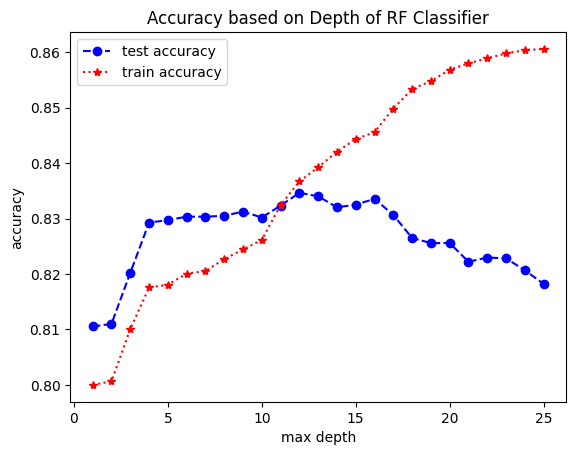

In [47]:
# plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.title("Accuracy based on Depth of RF Classifier")
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [48]:
# save the best random forest model, and save the feature importances
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
          feature  importance
1    capital-gain    0.370119
0             age    0.248969
3  hours-per-week    0.140480
2    capital-loss    0.140439
4        sex_Male    0.078258


## Create Additional Features and Retune
So far, there were 5 features used. Now more will be added in - specifically education. The features and labels will be prepared, then the models will be fit and tuned. 

### Create Features and Labels
Since there are so many possible values for education column, these will be binned into 3 ranges (up to high school, bachelors and college, masters and above). The data will then be split into training and testing. 

In [49]:
# look at the unique values in education bin
print(df["education"].value_counts())

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


In [50]:
# bin the data into 3 ranges: up to HS, College to Bachelors, Masters and above
df['education_bin'] = pd.cut(df['education-num'], [0,9,13,16], labels=['up to HS', 'College to Bachelors', 'Masters and above'])

In [51]:
feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']
# use new feature to regenerated feature set
X = pd.get_dummies(df[feature_cols], drop_first=True)

# no need to regenerate y as labels have not changed! 

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=.2)

### Build and Tune Random Forest Classifiers

In [53]:
np.random.seed(0)

accuracy_train=[]
accuracy_test = []
depths = range(1,10)
for i in depths:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, rf.predict(x_test)))
    accuracy_train.append(accuracy_score(y_train, rf.predict(x_train)))
    
best_acc= np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print(f'The highest accuracy on the test is achieved with depth {best_depth}')
print(f'The highest accuracy on the test set is {best_acc:.4f}')

The highest accuracy on the test is achieved with depth 9
The highest accuracy on the test set is 0.8443


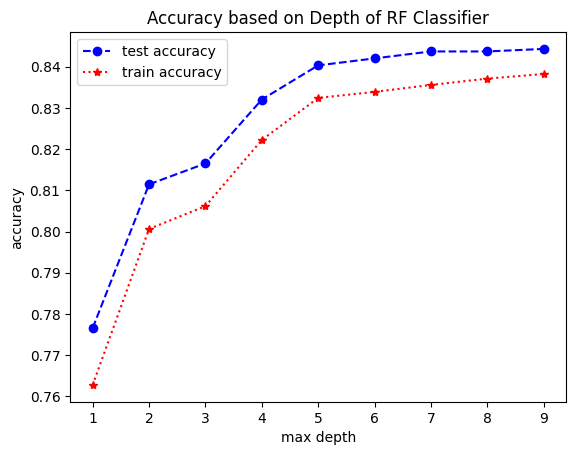

In [54]:
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.title("Accuracy based on Depth of RF Classifier")
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()

In [55]:
# save the best model and print the two features with the new feature set
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

feature_imp_df = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_),  columns=['feature', 'importance'])
print('Top 5 random forest features:')
print(feature_imp_df.sort_values('importance', ascending=False).iloc[0:5])

Top 5 random forest features:
                            feature  importance
1                      capital-gain    0.326836
0                               age    0.201973
10  education_bin_Masters and above    0.130849
3                    hours-per-week    0.102162
2                      capital-loss    0.095188
